## Importing the relevant packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
#from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("inputs\Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value']=df_comp.ftse

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The ACF

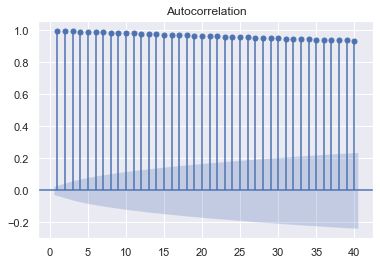

In [5]:
sgt.plot_acf(df.market_value, zero=False, lags=40)
plt.show()
#nota-se que a função de autocorrelação não apresenta uma queda exponencial, assemelhando-se muito mais a uma queda linear

## The PACF

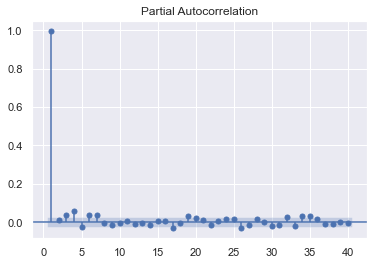

In [6]:
sgt.plot_pacf(df.market_value, zero=False, lags=40)
plt.show()
#nota-se que a pacf apresenta apenas 1 lag significante, ou seja, aparenta ser uma AR(1)

## The AR(1) Model

In [7]:
model_ar1 = ARIMA(df.market_value, order=(1,0,0))
results_ar1 = model_ar1.fit()
results_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -27622.604
Date:                Mon, 01 Aug 2022   AIC                          55251.207
Time:                        15:18:48   BIC                          55270.772
Sample:                    01-07-1994   HQIC                         55258.063
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6375    423.328     12.023      0.000    4259.930    5919.345
ar.L1          0.9984      0.001   1147.579      0.000       0.997       1.000
sigma2      3511.3842     40.874     85.907      0.000    3431.272    3591.496
===================================================================================
Ljung-Box (L1) (Q):                   1.51   Jarque-Bera (JB):              3313.33
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

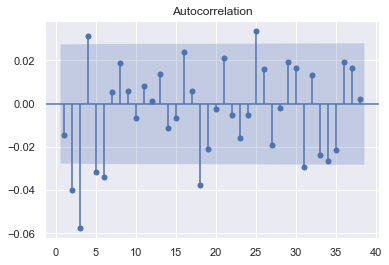

In [8]:
sgt.plot_acf(results_ar1.resid, zero=False)
plt.show()

In [9]:
from pmdarima import auto_arima

In [10]:
auto_arima(df.market_value, start_p=0, start_q=0)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

## Higher-Lag AR Models

## LLR Test

## Comparing Higher-Lag AR Models

## Analysing the Residuals